In [59]:
#Answer to 1.1
#Libraries
import pandas as pd
import numpy as np

#reading the csv files and giving them handles
tripsJan = pd.read_csv('raw-january.csv')
tripsJun = pd.read_csv('raw-june.csv')

#length of Jan and Jun csv (Number of rows)
janlen = len(tripsJan['pickup_datetime'])
junlen = len(tripsJun['pickup_datetime'])

#Turning the strings into datetime format
pickupJan = pd.to_datetime((tripsJan['pickup_datetime']), format = '%d/%m/%y %H:%M')
pickupJun = pd.to_datetime((tripsJun['pickup_datetime']), format = '%d/%m/%y %H:%M')

dropoffJan = pd.to_datetime((tripsJan['dropoff_datetime']), format = '%d/%m/%y %H:%M')
dropoffJun = pd.to_datetime((tripsJun['dropoff_datetime']), format = '%d/%m/%y %H:%M')

#Calculating the duration for Jan and Jun
durJan = dropoffJan - pickupJan
durJan = durJan/ np.timedelta64(60,'s')
durJan = pd.Series(durJan)

durJun = dropoffJun - pickupJun
durJun = durJun/ np.timedelta64(60,'s')
durJun = pd.Series(durJun)

#Creating the Data Frame for Jan
dataJan = pd.DataFrame(pd.Series(list(range(janlen))), columns = ['Index'])
dataJan['Duration'] = durJan
dataJan['Trip_distance'] = pd.Series(tripsJan.ix[:,'trip_distance'])
dataJan['Passenger_count'] = pd.Series(tripsJan.ix[:,'passenger_count'])
dataJan['Payment_amount'] = pd.Series(tripsJan.ix[:,'payment_amount'])

#Creating the Data Frame for Jun
dataJun = pd.DataFrame(pd.Series(list(range(junlen))), columns = ['Index'])
dataJun['Duration'] = durJun
dataJun['Trip_distance'] = pd.Series(tripsJun.ix[:,'trip_distance'])
dataJun['Passenger_count'] = pd.Series(tripsJun.ix[:,'passenger_count'])
dataJun['Payment_amount'] = pd.Series(tripsJun.ix[:,'payment_amount'])


         Index  Duration  Trip_distance  Passenger_count  Payment_amount
0            0       3.0           0.56                1            5.80
1            1      19.0           3.55                1           20.16
2            2       4.0           0.60                1            6.30
3            3       9.0           3.20                2           12.30
4            4      13.0           2.64                3           12.80
5            5      18.0           3.53                1           16.80
6            6      20.0           6.44                1           28.99
7            7      21.0          15.75                1           53.80
8            8      33.0           6.90                3           27.80
9            9      21.0           4.71                2           19.80
10          10      16.0           2.63                1           15.30
11          11      15.0           3.40                1           14.80
12          12       8.0           1.40            

In [58]:
#Answer to 1.2

#averages for distances
meandistJan = dataJan['Trip_distance'].mean()
meandistJun = dataJun['Trip_distance'].mean()

#averages for durations
meandurJan = dataJan['Duration'].mean()
meandurJun = dataJun['Duration'].mean()

#averages for passenger count
meanpsgcntJan = dataJan['Passenger_count'].mean()
meanpsgcntJun = dataJun['Passenger_count'].mean()

#printing average trip distances
print("****************************** Mean Trip Distance ******************************")
print("January: %2.3f"% meandistJan)
print("June: %2.3f"% meandistJun)
print("********************************************************************************")
print("\n")      

#printing average trip durations
print("****************************** Mean Trip Duration ******************************")
print("January: %2.3f"% meandurJan)
print("June: %2.3f"% meandurJun)
print("********************************************************************************")
print("\n")     

#printing average passenger counts
print("****************************** Mean Passenger Count ******************************")
print("January: %2.3f"% meanpsgcntJan)
print("June: %2.3f"% meanpsgcntJun)
print("**********************************************************************************")
print("\n")     

****************************** Mean Trip Distance ******************************
January: 2.883
June: 3.047
********************************************************************************


****************************** Mean Trip Duration ******************************
January: 14.958
June: 17.002
********************************************************************************


****************************** Mean Passenger Count ******************************
January: 1.669
June: 1.658
**********************************************************************************




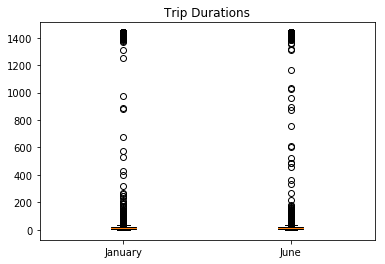

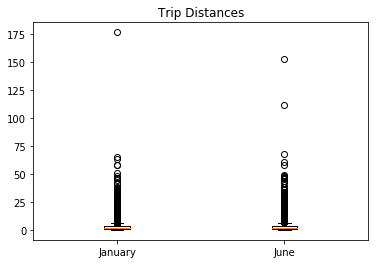

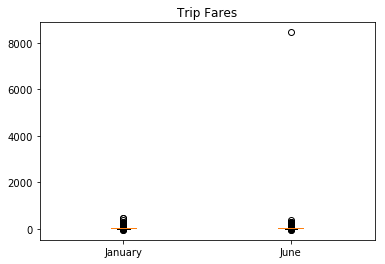

In [60]:
#Answer to 1.3

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
#set a label list for Jan and Jun
label = ['January', 'June']

#Creating a box plot for durations
durations = [dataJan['Duration'], dataJun['Duration']]
bpDur = plt.boxplot(durations, labels = label)
plt.title('Trip Durations')
plt.show()

#Creating a box plot for distances
distances = [dataJan['Trip_distance'], dataJun['Trip_distance']]
bdDist = plt.boxplot(distances, labels = label)
plt.title('Trip Distances')
plt.show()

#Creating a box plot for trip fares
payments = [dataJan['Payment_amount'], dataJun['Payment_amount']]
bdFare = plt.boxplot(payments, labels = label)
plt.title('Trip Fares')
plt.show()

# [USING THIS FOR QUESTION 1.4 FOR REFERENCE, PLEASE REFER TO BELOW]
#Creating a box plot for passenger count
#psgcnt = [dataJan['Passenger_count'], dataJun['Passenger_count']]
#bdPsg = plt.boxplot(psgcnt, labels = label)
#plt.title('Passenger Count')
#plt.show()

In [61]:
#Answer to 1.4

import pandas as pd

#PART 1
#A normal range for the value of each data would be a range within 1.5 of the IQR from the IQR range itself.
#An IQR range would be the range between the 3rd percentile and 1st percentile
#Anything 1.5 IQR above the 3rd percentile and below the 1.5 percentile are not considered to be outliers while
#some within 3 IQR range are, therefore an absolute range of non-outliers would be within 1.5 IQR from the IQR or the inner fence

#Since janlen is an odd number of values, the second percentile would be the median which is janlen//2 +1
median = (janlen//2)+1
firstP = (median//2)
thirdP = (median+ (median//2))


#sort the list according to the data values and get IQR range to get outer fence (DURATION)
#Distribution from the above boxplots show high concentration of clusters around both ends which is rare for normal distributions
#Outer fence would be used instead to prevent leaving out values by accident, outer fence of 3IQR
#sorting the coloumn with respect to the values and resetting the index 
sortedDur = (dataJan['Duration']).sort_values()
sortedDur = sortedDur.reset_index(drop=True) 
#calculating the unique IQR for the distribution for Duration and the outer fence
iqrDur = sortedDur[thirdP] - sortedDur[firstP]
outerDur = [(sortedDur[median]-(iqrDur*3)),(sortedDur[median]+(iqrDur*3))]


#sort the list according to the data values and get IQR range to get inner fence (TRIP DISTANCE)
#seems to follow a very standard normal distribution from the boxplots above and hence the inner fence would be enough 
sortedDist = (dataJan['Trip_distance']).sort_values()
sortedDist = sortedDist.reset_index(drop=True)
#inner fences upper and lower boundaries for distance using unique IQR for distribution for Distance
iqrDist = sortedDist[thirdP] - sortedDist[firstP]
innerDist = [(sortedDist[median]-(iqrDist*1.5)),(sortedDist[median]+(iqrDist*1.5))] 


#sort the list according to the data values and get IQR range to get outer fence (PASSENGER COUNT)
#passenger counts cover a small count size and a much wider spread for little whole values is needed to gain a better grasp
#there is no boxplots from above to see the exact distribution so I have provided one that is commented out for reference
sortedPsg = (dataJan['Passenger_count']).sort_values()
sortedPsg = sortedPsg.reset_index(drop=True)
#outer fences upper and lower boundaries for passenger count as spread needs to be wide for only 10 or so whole values
iqrPsg = sortedPsg[thirdP] - sortedPsg[firstP]
outerPsg = [(sortedPsg[median]-(iqrPsg*3)),(sortedPsg[median]+(iqrPsg*3))] 


#sort the list according to the data values and get IQR range to get inner fence (PAYMENT AMOUNT)
#seems to be rather normally distributed from the boxplot from 1.3 and would thus fit the above reason for inner fence
#After further analysis and comparing the values with its mean values as well as taking a look a the percentage of outliers 1.5iqr produced
#3IQR would be a better fit as to include more values and maximise the accuracy as we cant really have the mean considered one
sortedPay = (dataJan['Payment_amount']).sort_values()
sortedPay = sortedPay.reset_index(drop=True)
#inner fences upper and lower boundaries for payment amount
iqrPay = sortedPay[thirdP] - sortedPay[firstP]
outerPay = [(sortedPay[median]-(iqrPay*3)),(sortedPay[median]+(iqrDist*3))] 



#PART 2

#Instances counts
outlierDur = 0
outlierDist = 0
outlierPsg = 0
outlierPay = 0

#setting up lists to store values and strings for easy printing later
colNames = ['Duration', 'Trip_distance', 'Passenger_count', 'Payment_amount']
ranges = [outerDur, innerDist, outerPsg, outerPay]

#looping through each index to compare the 4 stats and count the instances of outliers
for i in range(janlen):
    if sortedDur[i]< outerDur[0] or sortedDur[i]> outerDur[1] :
        outlierDur+= 1
        
    if sortedDist[i]< innerDist[0] or sortedDist[i]> innerDist[1] :
        outlierDist+= 1
        
    if sortedPsg[i]< outerPsg[0] or sortedPsg[i]> outerPsg[1] :
        outlierPsg+= 1
        
    if sortedPay[i]< outerPay[0] or sortedPay[i]> outerPay[1] :
        outlierPay+= 1
        
outliers = [outlierDur, outlierDist, outlierPsg, outlierPay] #rounding up outliers into a list for easy use

#loop through list earlier prepared and print percentages for each stat
for j in range(len(colNames)):
    percent = (outliers[j]/janlen)*100  #calculating percent
    
    #As all of the lower ranges happen to dipped into the negatives with the lower boundary of their fences
    #I have replaced them with 0s
    print(120*'*')
    print("%2.3f"%percent+ "% of instances in", colNames[j] ,"are noisy! (normal range is between 0 and", "%.2f"%ranges[j][1],")")
    print(120*'*'+'\n')
    

#PART 3

#re-calculating variables for averages for some reason it did not pass over from 1.2
meandistJan = dataJan['Trip_distance'].mean()
meandurJan = dataJan['Duration'].mean()
meanpsgcntJan = dataJan['Passenger_count'].mean()
meanpayJan = dataJan['Payment_amount'].mean()

#looping through each index to replace the 4 stats' outliers with the respective averages
for i in range(janlen):
    if sortedDur[i]< outerDur[0] or sortedDur[i]> outerDur[1] :
        sortedDur[i] = meandurJan
        
    if sortedDist[i]< innerDist[0] or sortedDist[i]> innerDist[1] :
        sortedDist[i] = meandistJan
        
    if sortedPsg[i]< outerPsg[0] or sortedPsg[i]> outerPsg[1] :
        sortedPsg[i] = meanpsgcntJan
        
    if sortedPay[i]< outerPay[0] or sortedPay[i]> outerPay[1] :
        sortedPay[i] = meanpayJan

************************************************************************************************************************
2.023% of instances in Duration are noisy! (normal range is between 0 and 43.00 )
************************************************************************************************************************

************************************************************************************************************************
14.472% of instances in Trip_distance are noisy! (normal range is between 0 and 4.77 )
************************************************************************************************************************

************************************************************************************************************************
8.830% of instances in Passenger_count are noisy! (normal range is between 0 and 4.00 )
************************************************************************************************************************

**************

In [62]:
#Answer to 2.1

import pandas as pd

#reading the csv file and giving it a handle
cleanJan = pd.read_csv('clean-january.csv')
#reading through the pickup dates to find the days of the week it happens
pickupsAll = pd.to_datetime((cleanJan['pickup_datetime']), format = '%d/%m/%y %H:%M')
pickupdays = pickupsAll.dt.dayofweek

#loop through the list and give each value a true or false if its a weekend or not and count the weekend trips
weekends = []
wkendTrips = 0
for i in range(len(pickupdays)):
    if pickupdays[i] >= 5:
        weekends.append(1)
        wkendTrips += 1
    else:
        weekends.append(0)
        
#adding it to the data structure handle
cleanJan['isWeekend'] = pd.Series(weekends)
wkendPer = (wkendTrips/len(pickupdays))*100

print(80*"*")
print("%"+" of weekend trips = %.2f"%(wkendPer))
print(80*"*"+"\n")

********************************************************************************
% of weekend trips = 29.09
********************************************************************************



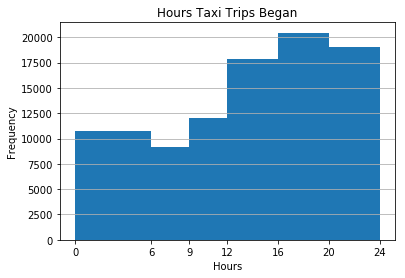

In [63]:
#Answer to 2.2

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

#create series for all pickup hours and adding it to dataframe
pickuphours = pd.Series(pickupsAll.dt.hour)
cleanJan['hour'] = pickuphours

#plot the historgram with 6 manually selected bins
plt.hist(pickuphours, bins=[0, 6, 9, 12, 16, 20, 24])
plt.axes().yaxis.grid(True, which='major')

#labelling the histogram and adjusting the sticks
plt.title("Hours Taxi Trips Began")
plt.ylabel("Frequency")
plt.xlabel("Hours")
plt.xticks([0,6,9,12,16,20,24])
plt.show()

<function matplotlib.pyplot.show>

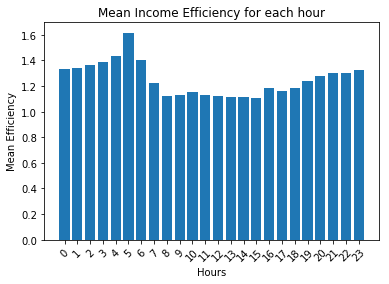

In [64]:
#Answer to 2.3
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange #for plotting

#creating the empty list for efficiency and hours list for labels later
hours = list(range(24))
efficiency = []
#appending the efficiencies into the list
for i in range(len(cleanJan['duration'])):
    efficiency.append(cleanJan['payment_amount'][i]/cleanJan['duration'][i])
#adding to the data frame
cleanJan['income_efficiency'] = pd.Series(efficiency)

#calculating the mean efficiency by each hour using groupby
efficiencyMeans = cleanJan.groupby(['hour'])['income_efficiency'].mean()

#plotting the bar plot
plt.bar(arange(len(hours)),efficiencyMeans)
plt.xticks(arange(len(hours)),hours, rotation=45)
#labelling the bar plot
plt.title("Mean Income Efficiency for each hour")
plt.ylabel("Mean Efficiency")
plt.xlabel("Hours")
plt.show